In [2]:
import tensorflow as tf

In [9]:
#Load the Fashion MNIST dataset
fmnist= tf.keras.datasets.fashion_mnist

In [10]:
#Load the training and test split of the fashion MNIST dataset
( training_images,training_labels), ( test_images,test_labels)= fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
# Normalize the pixel values of the train and test images
training_images = training_images/255.0
test_images = test_images/255.0

In [13]:
# Build the Classification model
model = tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2547 - accuracy: 0.9042
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2441 - accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2371 - accuracy: 0.9105
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2270 - accuracy: 0.9143
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2214 - accuracy: 0.9176


In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8802


[0.34438154101371765, 0.8802000284194946]

LABEL: 5

IMAGE PIXEL ARRAY: 
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0

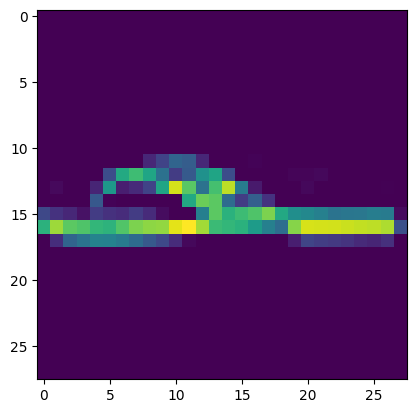

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#you can put between 0 to 59999
index=42006

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY: \n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])



In [29]:
# Predict the label for the first sample
first_sample = training_images[:1]   #Assuming X_train is a numpy array
predicted_probabilities = model.predict(first_sample)
predicted_label =tf.argmax(predicted_probabilities, axis=1).numpy()
print("predicted Label for the first sample: ", predicted_label)
print("probabilities: ", predicted_probabilities)

1/1 [==============================] - 0s 90ms/step
predicted Label for the first sample:  [9]
probabilities:  [[1.48781473e-11 8.19354418e-10 1.61044547e-08 3.62997299e-10 1.26597364e-08 4.89937338e-06 7.12701620e-10 5.97382151e-03 1.01105435e-08 9.94021237e-01]]


In [30]:
# Predict the label for the first sample
first_sample = training_images[15000:15001]   #Assuming X_train is a numpy array
predicted_probabilities = model.predict(first_sample)
predicted_label =tf.argmax(predicted_probabilities, axis=1).numpy()
print("predicted Label for the first sample: ", predicted_label)
print("probabilities: ", predicted_probabilities)

1/1 [==============================] - 0s 19ms/step
predicted Label for the first sample:  [2]
probabilities:  [[5.5924593e-04 2.1016848e-10 9.7536790e-01 5.6662920e-08 1.8973863e-02 8.9708202e-08 5.0986959e-03 1.8950165e-10 1.2933475e-07 1.7972814e-11]]
